In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [6]:
# making a list of columns with total number of missing values
print('Column'+ '\t\t\t\t Total missing Values'+'\t\t\t\t % of missing values')
#print("\n")
for i in df.columns:
    print(f"{i: <50}{df[i].isnull().sum():<30}{((df[i].isnull().sum())*100)/df.shape[0]: .2f}")

Column				 Total missing Values				 % of missing values
Pregnancies                                       0                              0.00
Glucose                                           5                              0.65
BloodPressure                                     35                             4.56
SkinThickness                                     227                            29.56
Insulin                                           374                            48.70
BMI                                               11                             1.43
DiabetesPedigreeFunction                          0                              0.00
Age                                               0                              0.00
Outcome                                           0                              0.00


In [7]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

In [8]:
# making a list of columns with total number of missing values
print('Column'+ '\t\t\t\t Total missing Values'+'\t\t\t\t % of missing values')
#print("\n")
for i in df.columns:
    print(f"{i: <50}{df[i].isnull().sum():<30}{((df[i].isnull().sum())*100)/df.shape[0]: .2f}")

Column				 Total missing Values				 % of missing values
Pregnancies                                       0                              0.00
Glucose                                           0                              0.00
BloodPressure                                     0                              0.00
SkinThickness                                     0                              0.00
Insulin                                           0                              0.00
BMI                                               0                              0.00
DiabetesPedigreeFunction                          0                              0.00
Age                                               0                              0.00
Outcome                                           0                              0.00


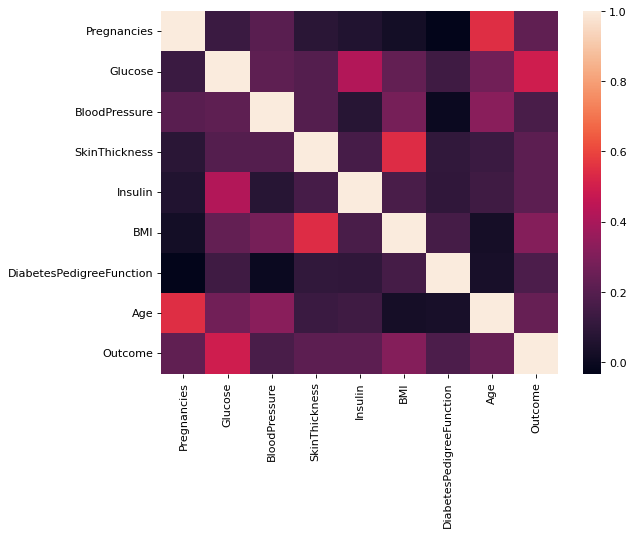

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(df.corr())
plt.show()

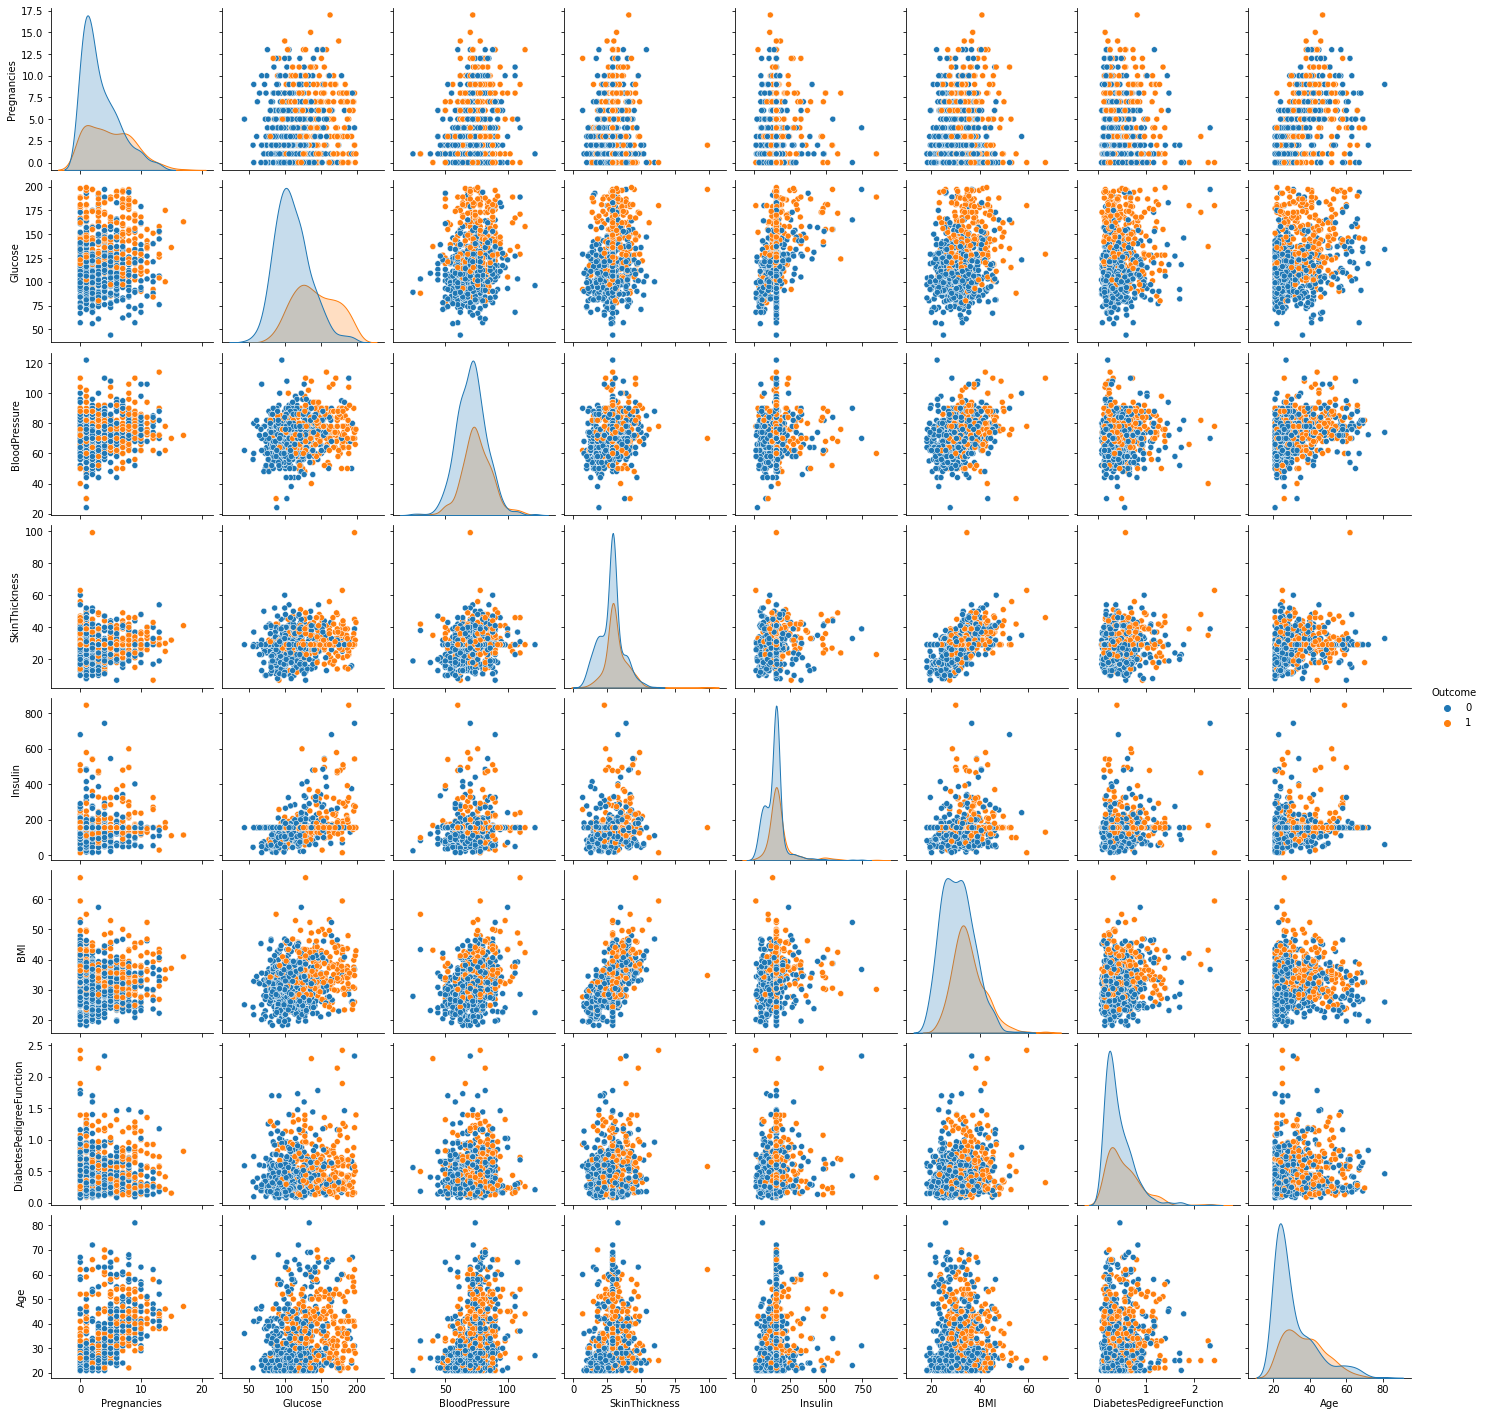

In [10]:
sns.pairplot(df,hue='Outcome')

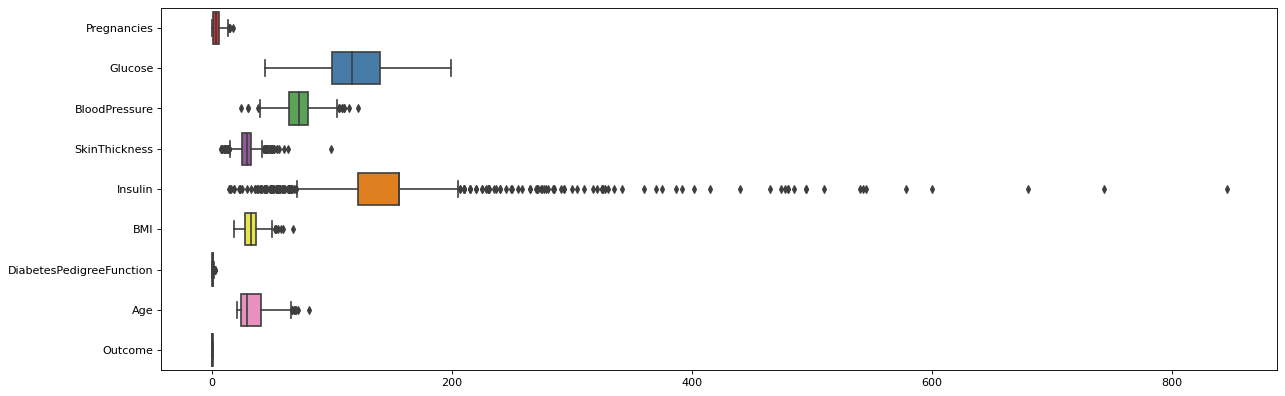

In [11]:
plt.figure(figsize=(18, 6), dpi=80)
sns.boxplot(data=df, orient="h",
            palette="Set1")

plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

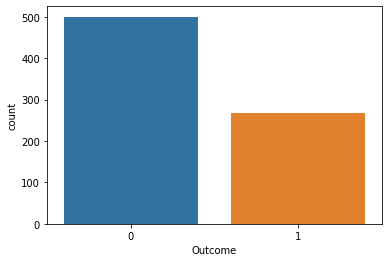

In [12]:
sns.countplot(x="Outcome", data=df)

In [13]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
scaling_x=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)

# **XGBOOST**


In [16]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
xgbcl = xgb.XGBClassifier()

param_grid = {'booster':['gbtree','gblinear'],
             'colsample_bytree':[0.4,0.6,0.8,1],
             'learning_rate':[0.01,0.1,0.2,0.4],
             'max_depth':[2,3,4,6],
             'n_estimators':[200,300,400,500],
              'subsample':[0.4,0.6,0.8,1]}

grid_xgb = RandomizedSearchCV(xgbcl,param_grid,n_iter=30,scoring='accuracy',cv = 10,refit = True)

In [17]:
grid_xgb.fit(X_train,y_train)
print("Best Score ==> ", grid_xgb.best_score_)
print("Tuned Paramerers ==> ",grid_xgb.best_params_)
print("Accuracy on Train set ==> ", grid_xgb.score(X_train,y_train))
print("Accuracy on Test set ==> ", grid_xgb.score(X_test,y_test))


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:33:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:33:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:33:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:33:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

## RandomForest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()#max_depth=None, min_samples_split=30, n_estimators=200,random_state = 0)
rfc.fit(X_train, y_train)
rfc.predict(X_test)
rfc.score(X_test, y_test)

0.7922077922077922

In [19]:
y_pred=rfc.predict(X_test)

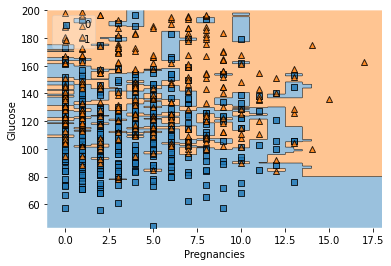

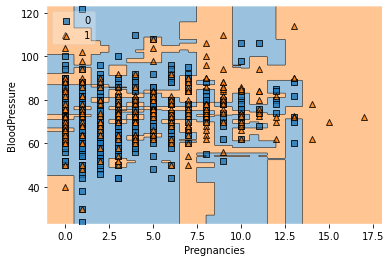

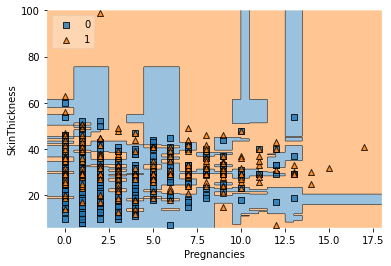

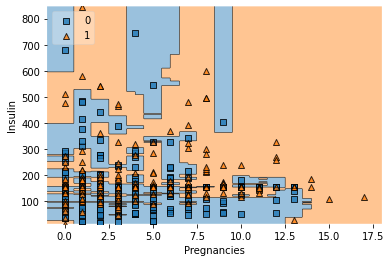

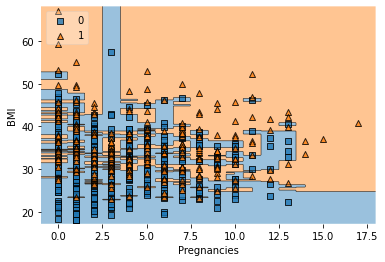

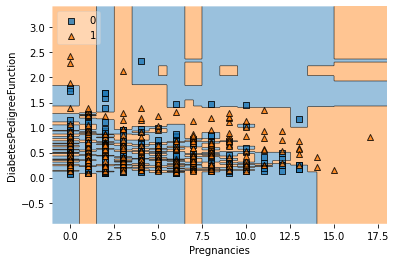

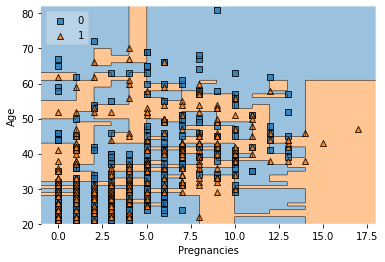

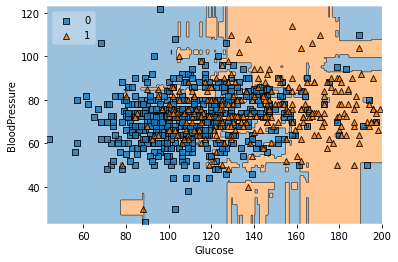

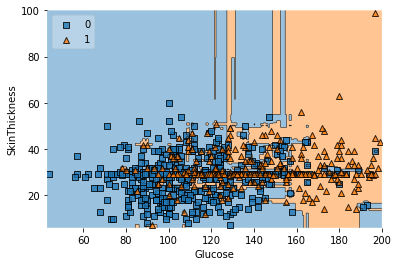

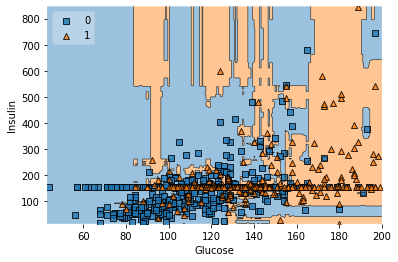

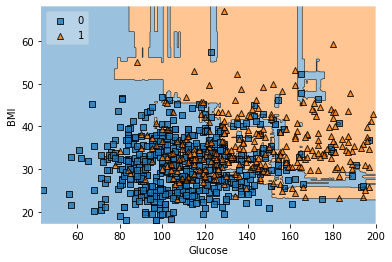

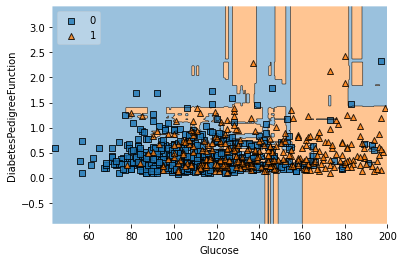

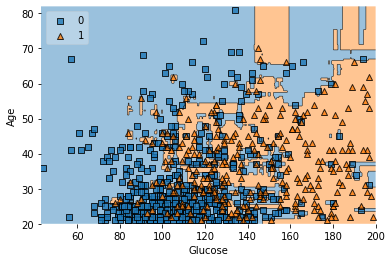

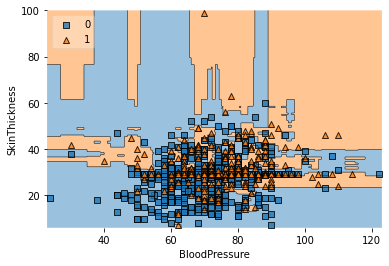

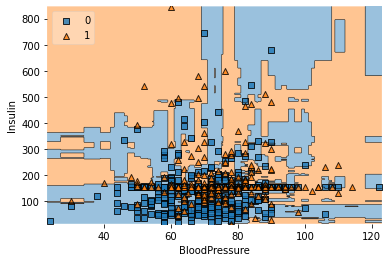

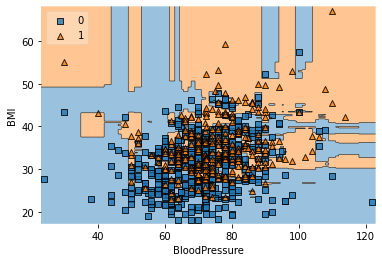

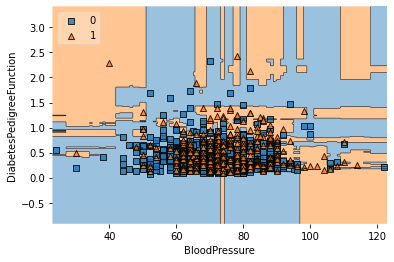

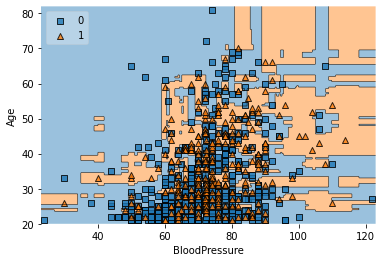

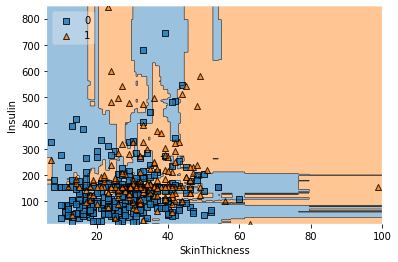

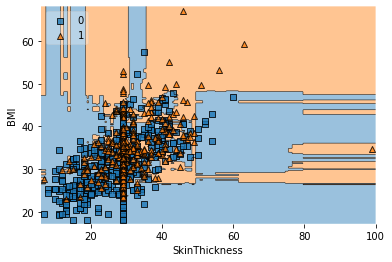

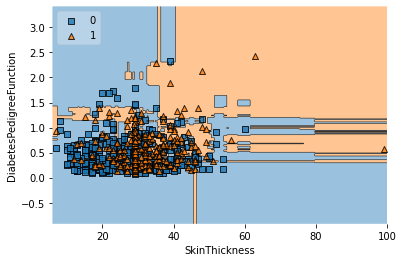

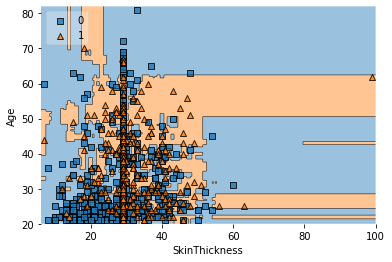

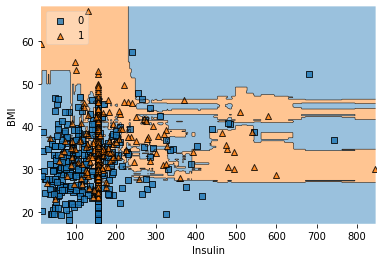

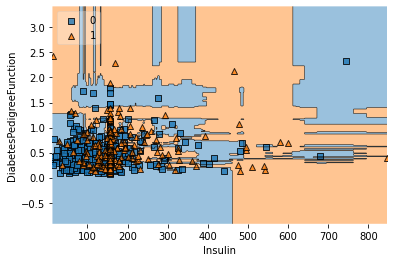

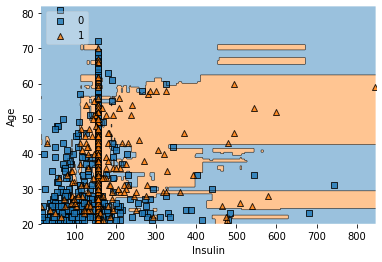

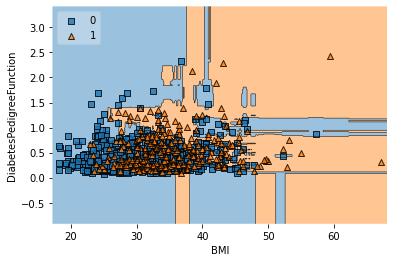

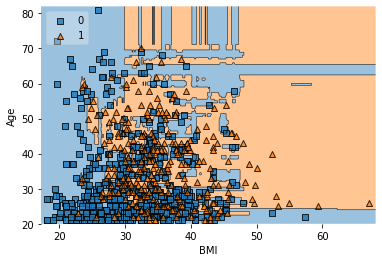

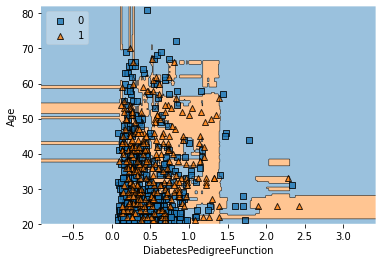

In [20]:
from mlxtend.plotting import plot_decision_regions
def classify_with_rfc(X,Y):
    x = df[[X,Y]].values
    y = df['Outcome'].astype(int).values

    rfc = RandomForestClassifier()
    rfc.fit(x,y)
    # Plotting decision region
    plot_decision_regions(x, y, clf=rfc, legend=2)
    # Adding axes annotations
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()
    
feat = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
size = len(feat)
for i in range(0,size):
    for j in range(i+1,size):
        classify_with_rfc(feat[i],feat[j])

<AxesSubplot:>

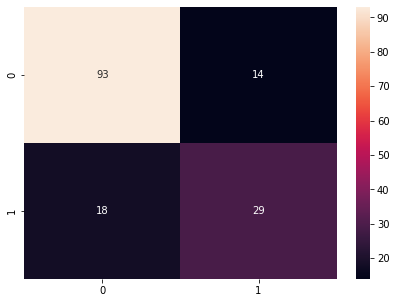

In [21]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(mat, annot=True)

In [22]:
from sklearn.metrics import classification_report
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Diabetes       0.84      0.87      0.85       107
      Normal       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



In [23]:
from sklearn.metrics import roc_curve
y_pred_proba = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

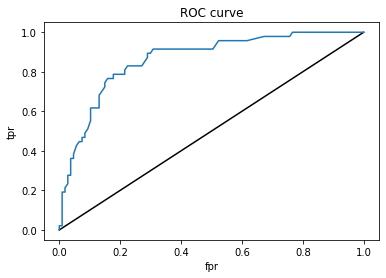

In [24]:
plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [25]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8624975144163849

In [26]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

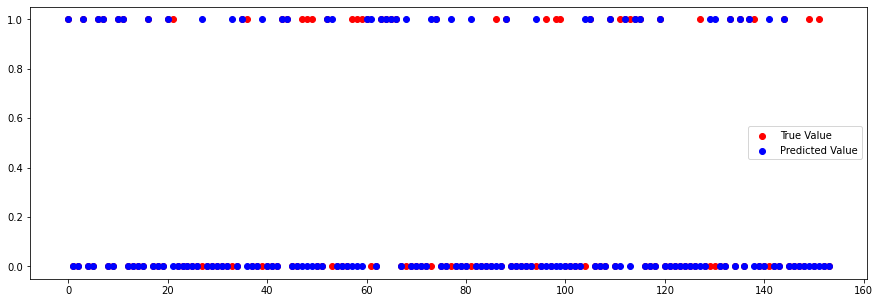

In [27]:
index = np.arange(0,len(y_test))
fig, ax = plt.subplots(1,1,figsize=(15,5))
plt.scatter(index,y_test,c="red",label = 'True Value')
plt.scatter(index,y_pred,c="blue", label = 'Predicted Value')

plt.legend()